# 🏥 Mapa Interativo das Unidades de Saúde Públicas - Uberlândia

Este notebook cria um mapa interativo exibindo a distribuição geográfica das unidades de saúde públicas da cidade de Uberlândia.  
Utilizamos dados oficiais dos sites da Prefeitura de Uberlândia e do Hospital das Clínicas da UFU.

O objetivo é analisar a cobertura territorial dos estabelecimentos de saúde, identificar áreas bem atendidas e regiões que podem requerer maior atenção em políticas públicas.

As principais bibliotecas usadas são: Folium, GeoPandas e OpenStreetMap.

---

## 🔗 Fontes dos Endereços

- [Prefeitura de Uberlândia - Unidades de Atendimento em Saúde](https://www.uberlandia.mg.gov.br/prefeitura/secretarias/saude/unidades-de-atendimento-em-saude/)
- [Hospital das Clínicas da Universidade Federal de Uberlândia (HC-UFU)](https://www.gov.br/ebserh/pt-br/hospitais-universitarios/regiao-sudeste/hc-ufu)

> **Nota**: As informações específicas de nome, categoria e localização dos estabelecimentos foram estruturadas manualmente no dicionário `Dic_EstabelecimentoSaude`, a partir dessas fontes públicas.

---

## 📥 Carregamento dos Dados

In [1]:
import folium
from pathlib import Path
import geopandas as gpd
from folium import Map, Marker, CustomIcon, Element
import sys
import os
from folium.plugins import MarkerCluster

In [2]:
caminho_raiz = os.path.abspath(os.path.join(".."))  # Ajuste os ".." conforme a profundidade do notebook
sys.path.append(caminho_raiz)

# import dos dic dos Estabelecimentos de Saude
from utils.listas import Dic_EstabelecimentoSaude

In [3]:
geojson_path = Path("data") / "bairros_uberlandia.geojson"

# Caminho do arquivo .geojson
geojson_path = Path("..") / "data" / "bairros_uberlandia.geojson"
gdf_bairros = gpd.read_file(geojson_path)

In [4]:
# Dicionario para vincular as Categorias com a imagem (icon) relacionada
dic_icone_categoria = {
    "Administrativo": "Administrativo.png",
    "CAPS": "CAPS.png",
    "Centro Especializado": "CentroEspecializado.png",
    "Hospital": "Hospital.png",
    "Laboratorio": "Laboratorio.png",
    "UAI": "UAI.png",
    "UBS": "UBS.png",
    "UBSF": "UBSF.png",
    "Unidade de Apoio": "UnidadeApoio.png"
}


In [5]:
# Dicionario para hieraquizar a plotagem dos pontos no mapa

z_index_categoria = {
    "Hospital": 100,
    "UAI": 90,
    "UBS": 80,
    "UBSF": 70,
    "Laboratorio": 60,
    "Administrativo": 50,
    "Unidade de Apoio": 40
}

## 🗺️ Construção do Mapa


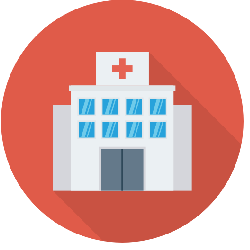
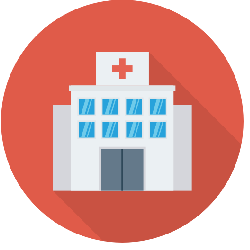
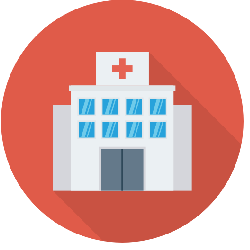
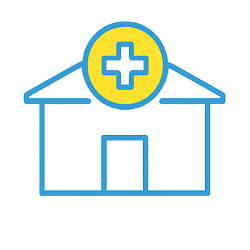
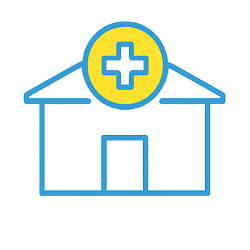
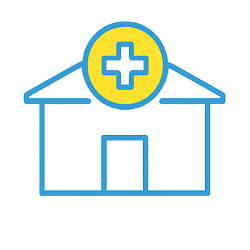
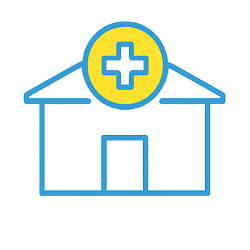
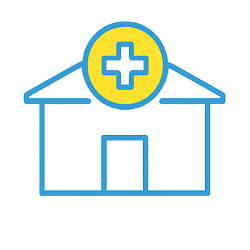
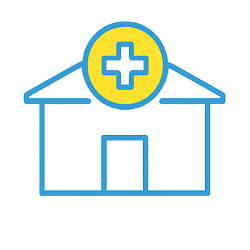
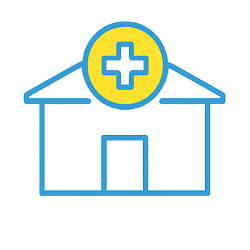
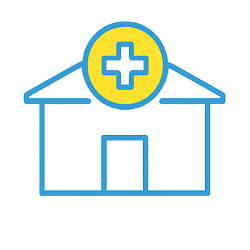
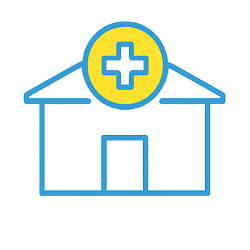
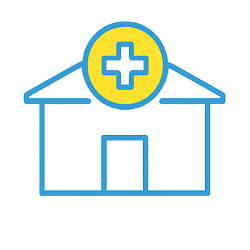
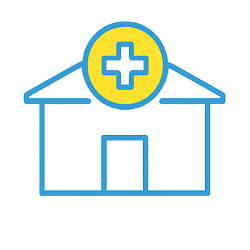
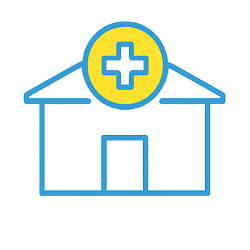
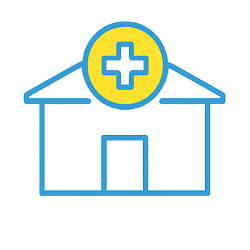
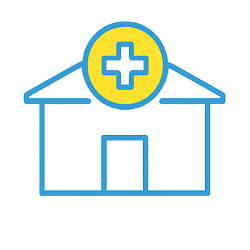
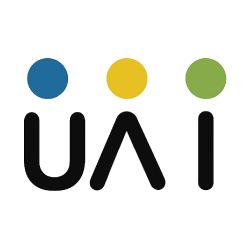
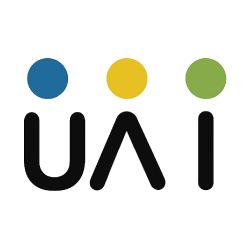
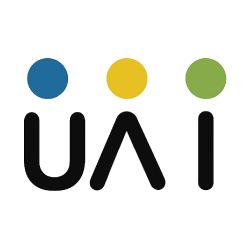
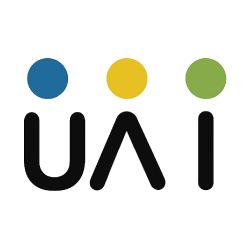
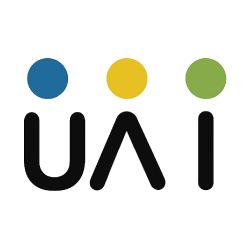
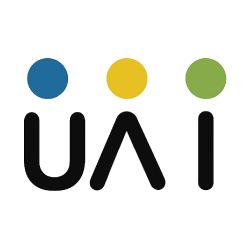
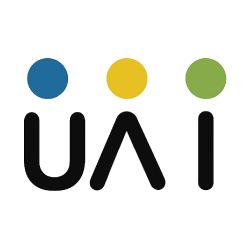
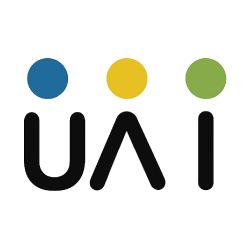
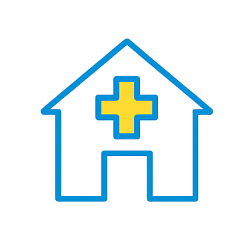
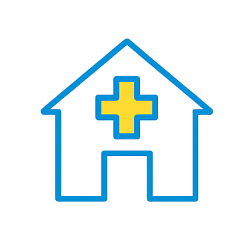
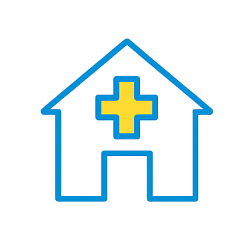
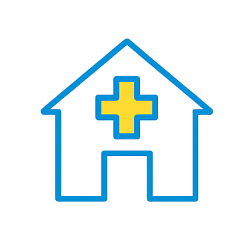
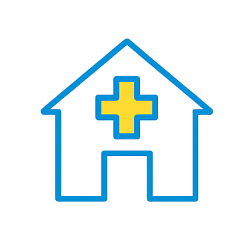
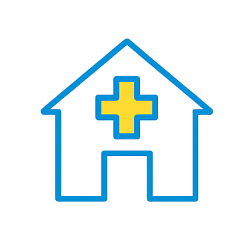
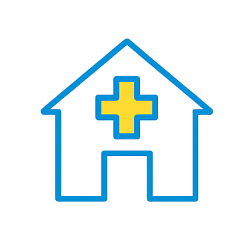
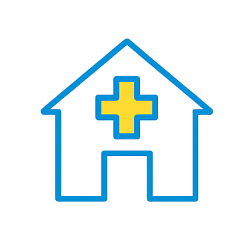
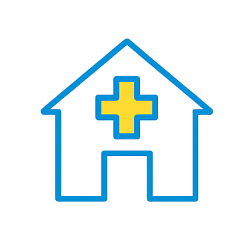
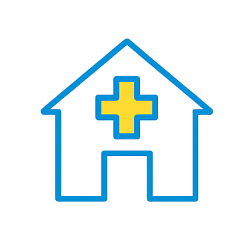
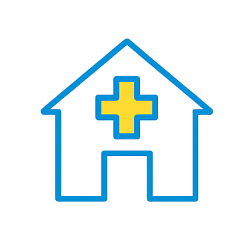
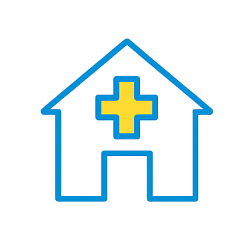
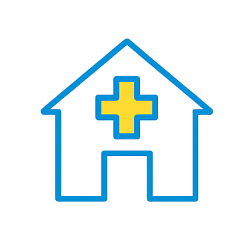
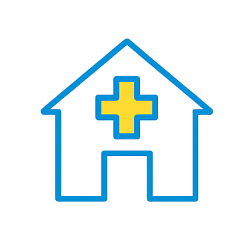
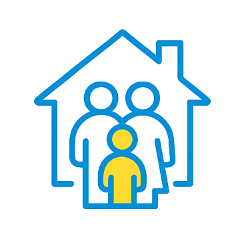
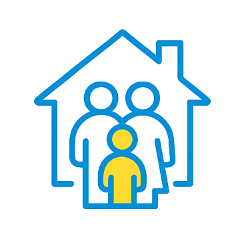
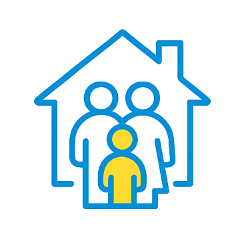
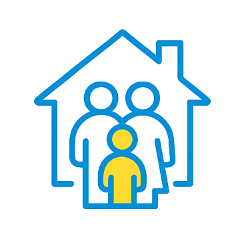
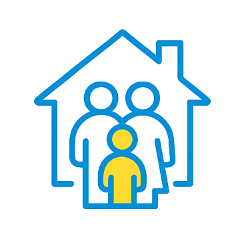
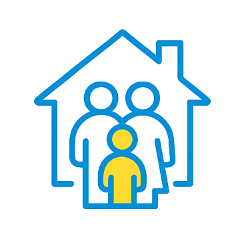
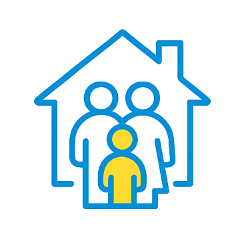
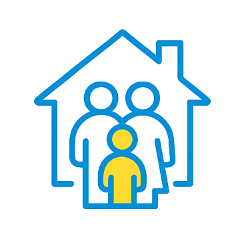
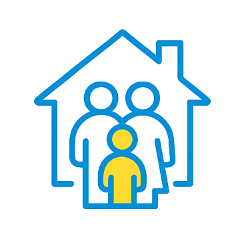
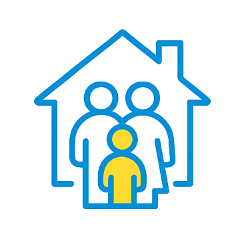
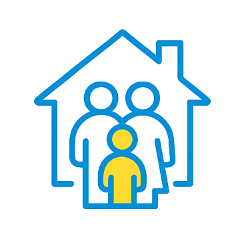
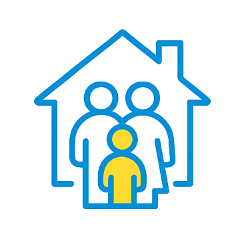
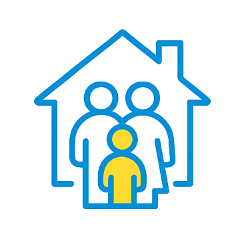
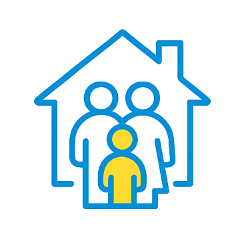
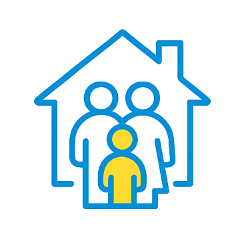
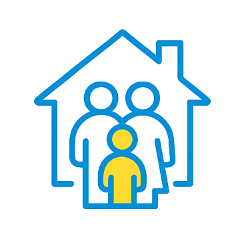
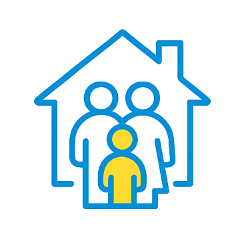
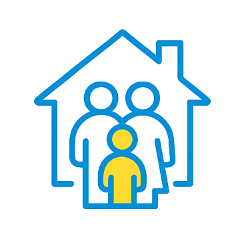
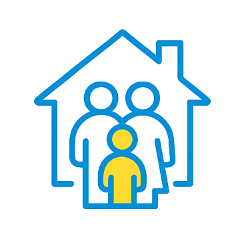
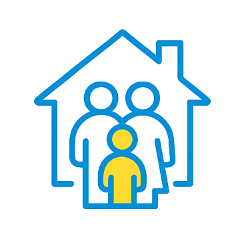
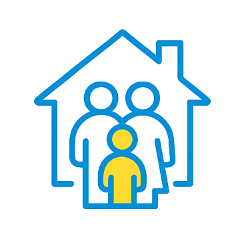
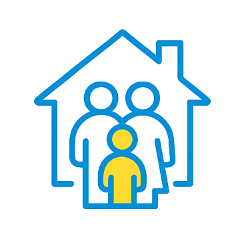
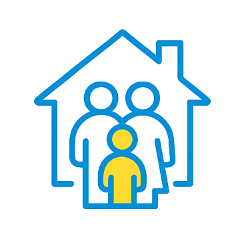
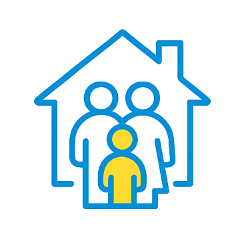
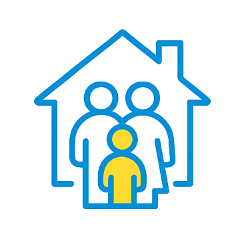
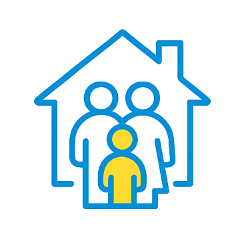
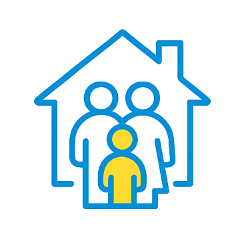
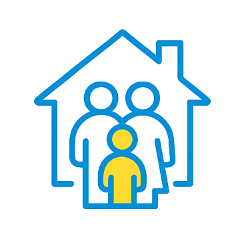
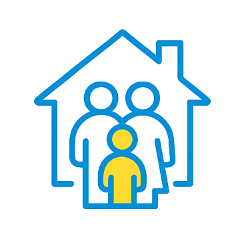
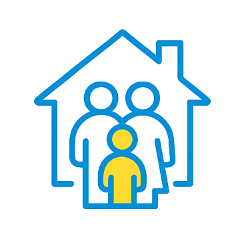
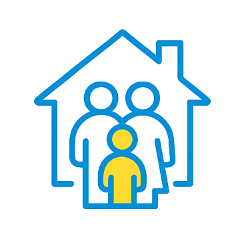
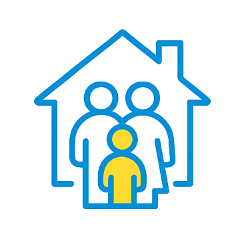
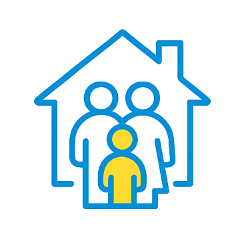
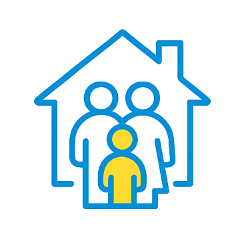
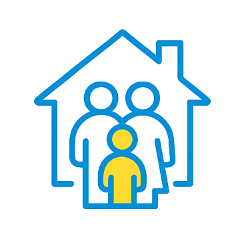
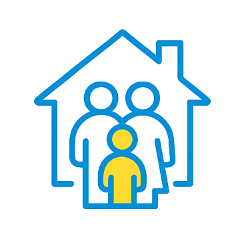
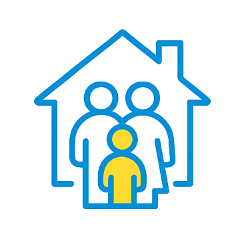
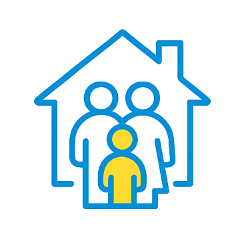
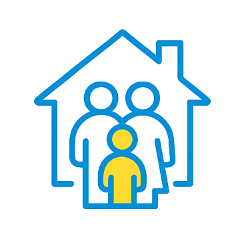
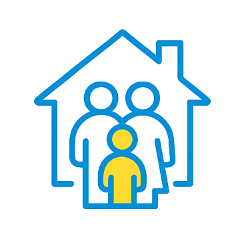
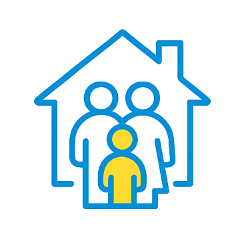
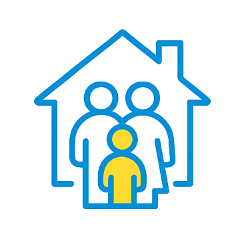
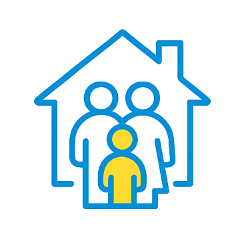
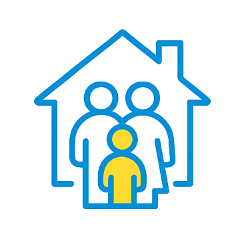
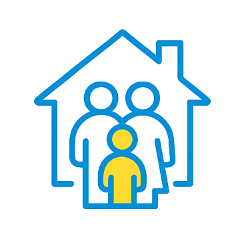
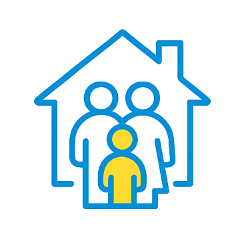
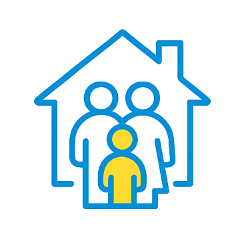
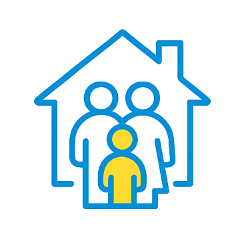
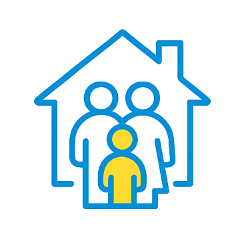
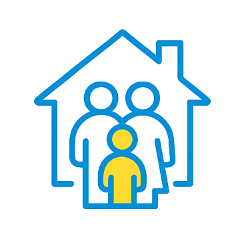
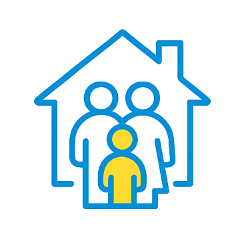
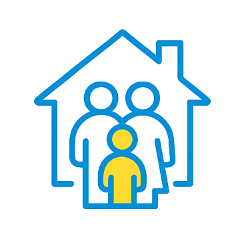
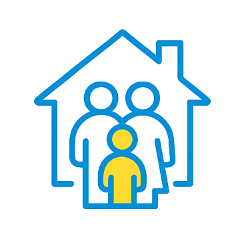
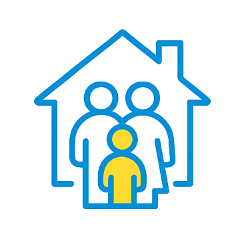
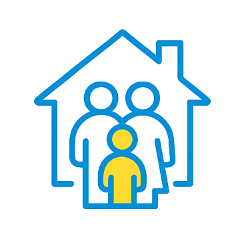
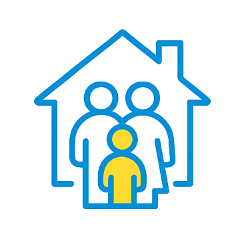
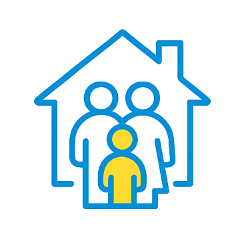
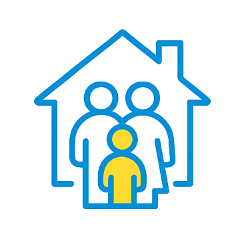
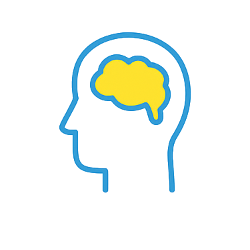
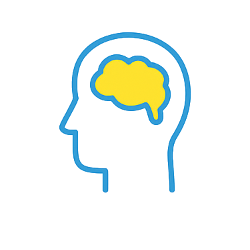
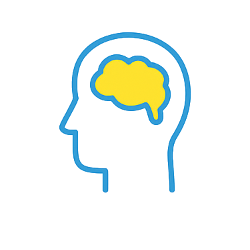
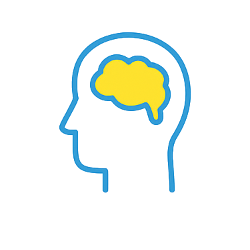
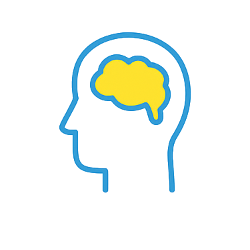
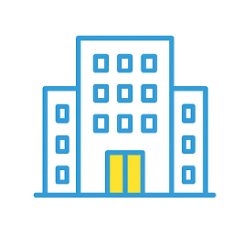
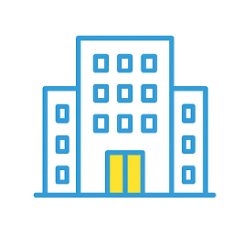
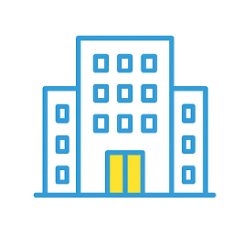
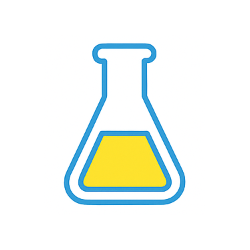
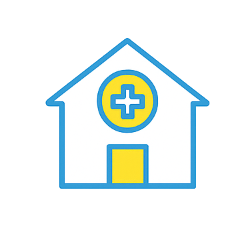
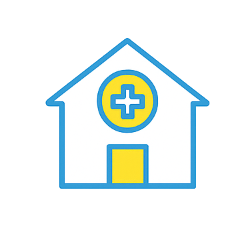

In [ ]:
# Cria  mapa 
mapa = folium.Map(location=[-18.914, -48.275], zoom_start=12)


titulo_html = """
    <h1 align="center" style="font-size:26px"><b>Unidades de Saúde - Uberlândia</b></h1>
"""
mapa.get_root().html.add_child(Element(titulo_html))

#folium.TileLayer("OpenStreetMap", control=False).add_to(mapa)


# Adiciona as areas dos bairro
folium.GeoJson(
    gdf_bairros,
    name="Zonas Territoriais",  
    control=False,             
    style_function=lambda feature: {
        "fillColor": feature["properties"]["cor"],
        "color": "black",
        "weight": 0.5,
        "fillOpacity": 0.6,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["bairro", "zona_territorial"],
        aliases=["Bairro:", "Zona:"]
    )
).add_to(mapa)


# Cria os FeatureGroups por categoria
grupos_categoria = {}

for nome, info in Dic_EstabelecimentoSaude.items():
    if "lat" in info and "lon" in info:
        categoria = info.get("Categoria", "Outros")
        icon_file = dic_icone_categoria.get(categoria, "SaudePadrao.png")
        z_index = z_index_categoria.get(categoria, 1)

        # Cria o grupo se ainda não existir
        if categoria not in grupos_categoria:
            grupos_categoria[categoria] = folium.FeatureGroup(name=categoria, show=True)
            mapa.add_child(grupos_categoria[categoria])

        # Cria marcador com ícone
        marcador = folium.Marker(
            location=[info["lat"], info["lon"]],
            tooltip=(
                f'<b>Estabelecimento: </b>{nome}<br>'
                f'<b>Endereço:  </b>{info["Endereço"]}<br>'
                f'<b>Funcionamento:  </b>{info["Funcionamento"]}<br>'
                f'<b>Categoria:  </b>{info["Categoria"]}'
            ),
            icon=folium.CustomIcon(
                icon_image=f"../icons/{icon_file}",
                icon_size=(30, 30)
            ),
            z_index_offset=z_index
        )

        marcador.add_to(grupos_categoria[categoria])

# Adiciona controle de camadas (checkboxes)
folium.LayerControl(collapsed=False, position='topright').add_to(mapa)


mapa.save("../MapsHTML/mapa_SaudeUberlandia.html")

mapa


# ⚕️ Explicação rápida do Mapa de Unidades de Saúde - Uberlândia

- O mapa é inicializado focado em Uberlândia, usando o OpenStreetMap como fundo.
- As zonas territoriais dos bairros são desenhadas a partir de um arquivo GeoJSON (gdf_bairros), com cores específicas por zona.
- Cada unidade de saúde é plotada como um marcador personalizado, com ícones diferentes para Hospital, UBS, UAI, etc.
- Os estabelecimentos são organizados em grupos por categoria (FeatureGroups).
- Um menu de camadas (LayerControl) permite ligar ou desligar a visualização de cada tipo de unidade.
- O mapa final é exportado em formato HTML e pode ser aberto fora do Jupyter.

---